importing all the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

reading the csv file

In [2]:
df = pd.read_csv("D:\\HeartFailure\\heart.csv")

In [3]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

- Age: Age of the patient in years.
- Sex: Gender of the patient (M: Male, F: Female).
- ChestPainType: Type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain,   ASY: Asymptomatic).
- RestingBP: Resting blood pressure in mm Hg.
- Cholesterol: Serum cholesterol level in mm/dl.
- FastingBS: Fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise).
- RestingECG: Resting electrocardiogram results (Normal, ST: ST-T wave abnormality, LVH: Left         ventricular hypertrophy).
- MaxHR: Maximum heart rate achieved (numeric value between 60 and 202).
- ExerciseAngina: Presence of exercise-induced angina (Y: Yes, N: No).
- Oldpeak: ST depression measured as a numeric value.
- ST_Slope: The slope of the peak exercise ST segment (Up, Flat, Down).
- HeartDisease: Output class (1: presence of heart disease, 0: normal).

some of the data analysis steps involved are

In [4]:
df.shape

(918, 12)

there are 918 rows and 12 columns

In [5]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [6]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

describe gives the summary statistics of all numeric columns

In [9]:
df.describe(include = 'all').T

count unique     top freq        mean         std   min  \
Age             918.0    NaN     NaN  NaN   53.510893    9.432617  28.0   
Sex               918      2       M  725         NaN         NaN   NaN   
ChestPainType     918      4     ASY  496         NaN         NaN   NaN   
RestingBP       918.0    NaN     NaN  NaN  132.396514   18.514154   0.0   
Cholesterol     918.0    NaN     NaN  NaN  198.799564  109.384145   0.0   
FastingBS       918.0    NaN     NaN  NaN    0.233115    0.423046   0.0   
RestingECG        918      3  Normal  552         NaN         NaN   NaN   
MaxHR           918.0    NaN     NaN  NaN  136.809368   25.460334  60.0   
ExerciseAngina    918      2       N  547         NaN         NaN   NaN   
Oldpeak         918.0    NaN     NaN  NaN    0.887364     1.06657  -2.6   
ST_Slope          918      3    Flat  460         NaN         NaN   NaN   
HeartDisease    918.0    NaN     NaN  NaN    0.553377    0.497414   0.0   

                   25%    50%    75%    max  
Age               47.0   54.0   60.0   77.0  
Sex                NaN    NaN    NaN    NaN  
ChestPainType      NaN    NaN    NaN    NaN  
RestingBP        120.0  130.0  140.0  200.0  
Cholesterol     173.25  223.0  267.0  603.0  
FastingBS          0.0    0.0    0.0    1.0  
RestingECG         NaN    NaN    NaN    NaN  
MaxHR            120.0  138.0  156.0  202.0  
ExerciseAngina     NaN    NaN    NaN    NaN  
Oldpeak            0.0    0.6    1.5    6.2  
ST_Slope           NaN    NaN    NaN    NaN  
HeartDisease       0.0    1.0    1.0    1.0

describe include = 'all' gives the summary statistics of both numerical and categorical

In [10]:
df.describe(include = 'O').T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

describe include = 'O' gives the summary statistics of only Objects

In [11]:
df[df.duplicated()].sum()

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

there is no duplicate values.

In [12]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

there no nan values.

<Axes: >

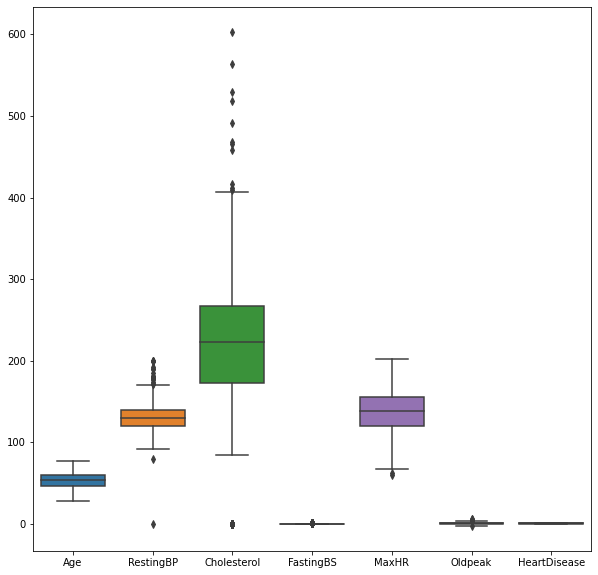

In [13]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df)

Boxplot gives us the clear cut idea if there are outliers present.

<Axes: xlabel='Cholesterol'>

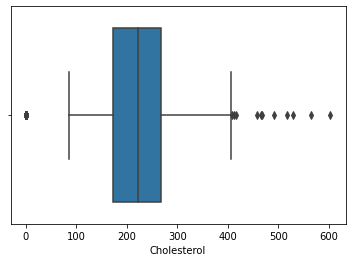

In [14]:
sns.boxplot(df['Cholesterol'])

Text(0.75, 400, 'MAX')

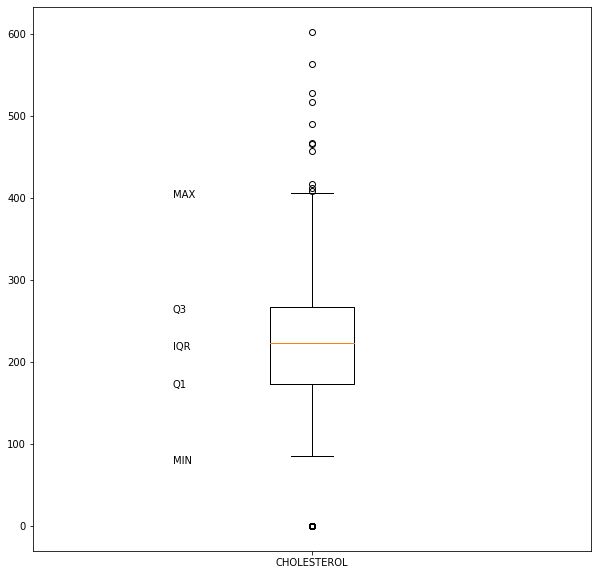

In [15]:
plt.figure(figsize = (10,10))
plt.boxplot(data = df, x = 'Cholesterol',labels = ['CHOLESTEROL'])
plt.text(x = 0.75,y = 76, s = "MIN")
plt.text(x = 0.75,y = 168, s = "Q1")
plt.text(x = 0.75,y = 215, s = "IQR")
plt.text(x = 0.75,y = 260, s = "Q3")
plt.text(x = 0.75,y = 400, s = "MAX")

- boxplot gives us a clear visualization of the values which are greater than max.
- boxplot contains 5 number summary.
 - min
 - 25%
 - 50%
 - 75%
 - max
    
- here min value is 0.0
- max value is 603.0
- Q1 that is 25%, which means 120.0 data values lie below 25%
- Q3 that is 75%, which means 267.0 data values lie below 75%
- IQR that is 50%, IQR = Q3 - Q1 , 267.0 - 120.0 = 147.0 ,which means 147.0 data values lie below 50%.

lets identify which are outliers
- Upper bound - is a boundary where max is the first value in upper bound
  - ub = Q3 + (1.5 * IQR)
  - ub = 267 + (1.5 * 147)
  - ub = 487.5 (values above this value are treated as outliers)
    
-lower bound - is a boundary where min is the first value in  lower bound
  - lb = Q1 - (1.5 * IQR)
  - lb = 120.0 - (1.5 * 147)
  - lb = 100.5 (values below this value are treated as potential lower outliers)

In [16]:
df.groupby(['ChestPainType'])['HeartDisease'].mean()

ChestPainType
ASY    0.790323
ATA    0.138728
NAP    0.354680
TA     0.434783
Name: HeartDisease, dtype: float64

people who often tend to get ASY: Asymptomatic type of chest pain have the high chances of getting HeartDisease

In [17]:
df.groupby(['ChestPainType','ExerciseAngina'])['HeartDisease'].mean().sort_values(ascending = False)

ChestPainType  ExerciseAngina
ASY            Y                 0.902357
NAP            Y                 0.705882
ASY            N                 0.623116
ATA            Y                 0.529412
TA             Y                 0.500000
               N                 0.425000
NAP            N                 0.236842
ATA            N                 0.096154
Name: HeartDisease, dtype: float64

People who get ASY: Asymptomatic type of chest pain and do exercise-induced angina are getting HeartDisease the most.

In [18]:
pd.pivot_table(data = df, index = 'Sex',values = 'HeartDisease').sort_values(by = 'HeartDisease',ascending = False)

HeartDisease
Sex              
M        0.631724
F        0.259067

Over here people who are male are highest in count in getting heart disease.

In [19]:
pd.pivot_table(data = df, index = 'RestingECG',columns = 'ExerciseAngina', values = 'HeartDisease')

ExerciseAngina         N         Y
RestingECG                        
LVH             0.400000  0.821918
Normal          0.321739  0.840580
ST              0.402299  0.901099

people who have  ST: ST-T wave abnormality and do exercise-induced angina are getting heart diseases in higher count.

In [20]:
pd.crosstab( index = df['ChestPainType'], columns = df['ST_Slope'], values = df['HeartDisease'],aggfunc = 'count')

ST_Slope       Down  Flat   Up
ChestPainType                 
ASY              46   318  132
ATA               3    32  138
NAP              10    88  105
TA                4    22   20

The "slope of the peak exercise ST segment" is a feature often measured in electrocardiogram (ECG) data and is used in the context of diagnosing heart conditions.
people who do flat ST slope and get ASY chest pain are often getting heart disease.


In [21]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<Axes: ylabel='Density'>

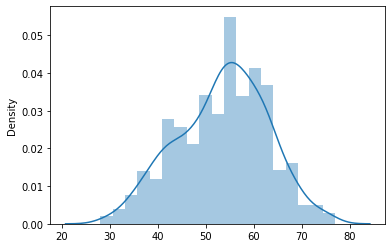

In [22]:
sns.distplot(x = df['Age'])

The plot is negatively skewed as most of the people in the dataset are below age 55.

<Axes: ylabel='Density'>

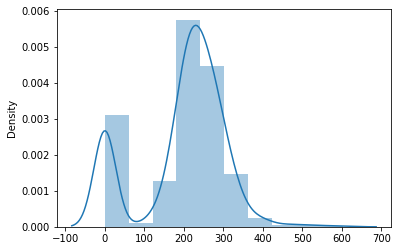

In [23]:
sns.distplot( x = df['Cholesterol'],bins = 10)

Most of the people have 0 Cholesterol, and highest frequency is 250 which indicates most people serum cholesterol [mm/dl] 250 

<Axes: xlabel='ChestPainType', ylabel='count'>

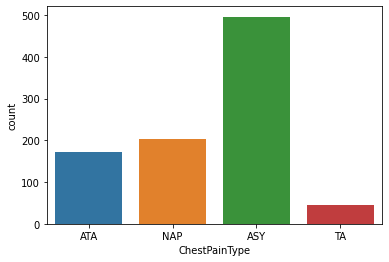

In [24]:
sns.countplot(data = df, x = 'ChestPainType')

Most of the people in dataset are having ASY: Asymptomatic chestpain.

<Axes: xlabel='HeartDisease', ylabel='Age'>

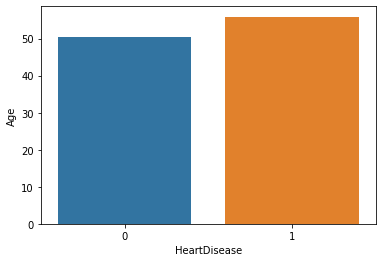

In [25]:
sns.barplot(data = df, x = 'HeartDisease',y= 'Age',ci = None)

<Axes: xlabel='Sex', ylabel='Cholesterol'>

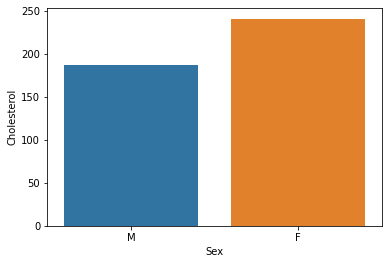

In [26]:
sns.barplot(data = df, x = 'Sex',y = 'Cholesterol',ci = None)

Over here analysis made is Females have been counted as having more cholestrol than male.

<Axes: xlabel='Sex', ylabel='HeartDisease'>

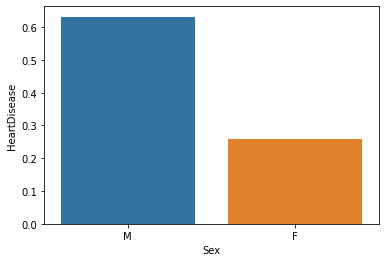

In [27]:
sns.barplot(data = df, x = 'Sex',y = 'HeartDisease',ci = None)

This shows that Male are highest in population of heart disease.

<Axes: xlabel='Sex', ylabel='HeartDisease'>

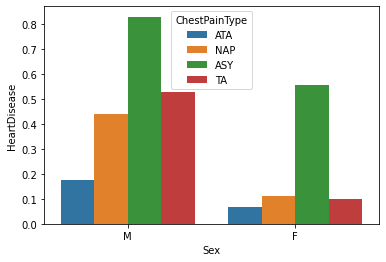

In [28]:
sns.barplot(data = df, x = 'Sex',y = 'HeartDisease',hue = 'ChestPainType',ci = None)

Male people are counted as highest in population of having Chest pain.

<Axes: xlabel='Age', ylabel='Cholesterol'>

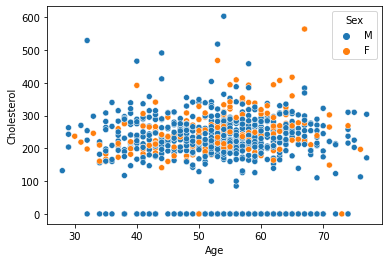

In [29]:
sns.scatterplot(data = df, x = 'Age',y = 'Cholesterol',hue = 'Sex')

Age and Cholestrol have no signicant relation.

<Axes: xlabel='Age', ylabel='Cholesterol'>

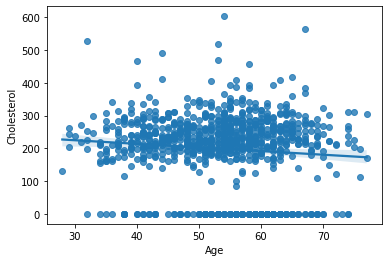

In [30]:
sns.regplot(data = df, x = 'Age',y = 'Cholesterol')

Regression plot also shows that there is no significant co-relation between age and Cholestrol

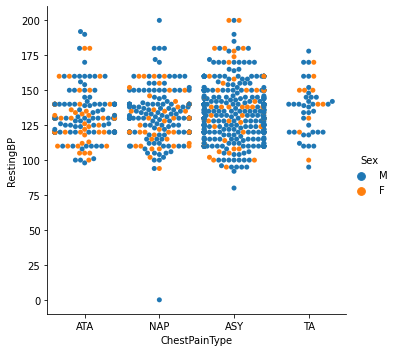

In [31]:
sns.catplot(data = df, x = 'ChestPainType',y = 'RestingBP',hue = 'Sex',kind = 'swarm')

This gives a clear indication that
- Most of the males have ASY type of chestpain and resting bp is between 100-150.

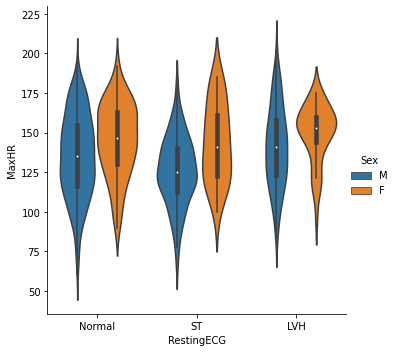

In [32]:
sns.catplot(data = df, x = 'RestingECG',y = 'MaxHR',hue = 'Sex',kind = 'violin')

In [33]:
corr = df.corr()
corr['HeartDisease']

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

except restingbp every other variable having good co-relation with respect to heart disease.

<Axes: >

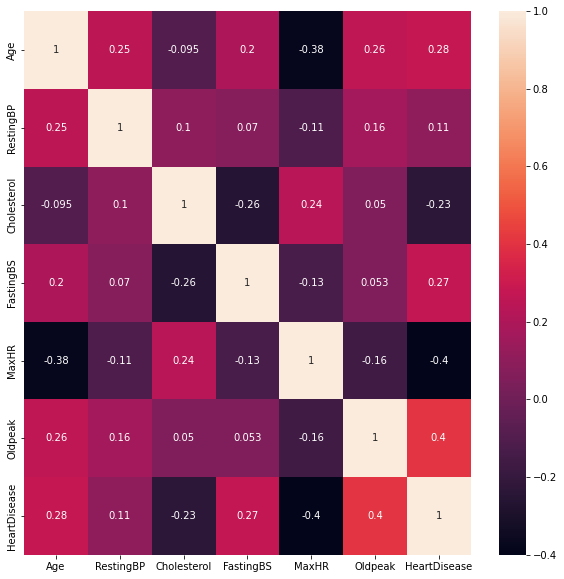

In [34]:
plt.figure(figsize = (10,10))
sns.heatmap(data = corr,annot = True)

as the columns sex, chestpaintype is required so encoding is mandatory.

In [35]:
df = pd.get_dummies(df, columns=['Sex'])


In [36]:
df = pd.get_dummies(df, columns=['ChestPainType','ExerciseAngina'])


In [37]:
df

Age  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  Oldpeak  \
0     40        140          289          0     Normal    172      0.0   
1     49        160          180          0     Normal    156      1.0   
2     37        130          283          0         ST     98      0.0   
3     48        138          214          0     Normal    108      1.5   
4     54        150          195          0     Normal    122      0.0   
..   ...        ...          ...        ...        ...    ...      ...   
913   45        110          264          0     Normal    132      1.2   
914   68        144          193          1     Normal    141      3.4   
915   57        130          131          0     Normal    115      1.2   
916   57        130          236          0        LVH    174      0.0   
917   38        138          175          0     Normal    173      0.0   

    ST_Slope  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  \
0         Up             0      0      1                  0   
1       Flat             1      1      0                  0   
2         Up             0      0      1                  0   
3       Flat             1      1      0                  1   
4         Up             0      0      1                  0   
..       ...           ...    ...    ...                ...   
913     Flat             1      0      1                  0   
914     Flat             1      0      1                  1   
915     Flat             1      0      1                  1   
916     Flat             1      1      0                  0   
917       Up             0      0      1                  0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  ExerciseAngina_N  \
0                    1                  0                 0                 1   
1                    0                  1                 0                 1   
2                    1                  0                 0                 1   
3                    0                  0                 0                 0   
4                    0                  1                 0                 1   
..                 ...                ...               ...               ...   
913                  0                  0                 1                 1   
914                  0                  0                 0                 1   
915                  0                  0                 0                 0   
916                  1                  0                 0                 1   
917                  0                  1                 0                 1   

     ExerciseAngina_Y  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
..                ...  
913                 0  
914                 0  
915                 1  
916                 0  
917                 0  

[918 rows x 17 columns]

In [38]:
x = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA']]
y = df['HeartDisease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

Logistic Regression Model

In [39]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)




accuracy: 0.8369565217391305


In [40]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix:",confusion_matrix)


confusion matrix: [[62 12]
 [18 92]]


In [41]:
classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        74
           1       0.88      0.84      0.86       110

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



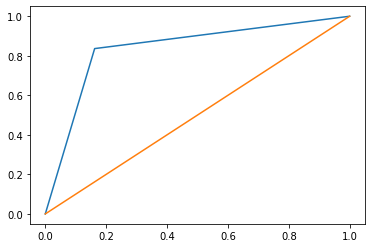

In [42]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpt,trp,threshold = roc_curve(y_test,y_pred)
plt.plot(fpt,trp)
plt.plot([0,1],[0,1])

- The AUC value ranges from 0 to 1, where 0.5 represents random chance (the classifier is no better than random guessing), and 1 represents a perfect classifier.
- A higher AUC indicates better classification performance. An AUC of 1 means the model can perfectly distinguish between positive and negative instances.

Logistic Regression
    - It gives accuracy of 84%
    - Precision in 0 class out of all instance 78% were correctly predicted, in 1 class out of all instance 88% were correctly predicted by model.
    - For class '0,' the recall is 0.84. This means that the model correctly identified 84% of all actual class '0' instances.
    - For class '1,' the recall is 0.84. This means that the model correctly identified 84% of all actual class '1' instances.
 

Decision Tree Classifier

In [43]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)



accuracy: 0.7228260869565217


In [58]:

confusion_matrix_result = confusion_matrix(y_test, y_pred)

print(confusion_matrix_result)




[[58 16]
 [15 95]]


In [61]:

classification_report_result = classification_report(y_test, y_pred)

print(classification_report_result)


              precision    recall  f1-score   support

           0       0.79      0.78      0.79        74
           1       0.86      0.86      0.86       110

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



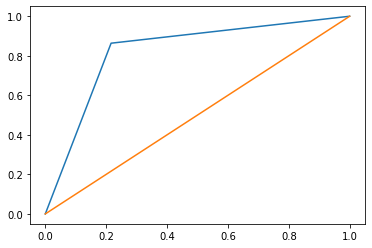

In [56]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpt,trp,threshold = roc_curve(y_test,y_pred)
plt.plot(fpt,trp)
plt.plot([0,1],[0,1])

Decision Tree Classifier
    - It gives accuracy of 72%
    - Precision in 0 class out of all instance 79% were correctly predicted, in 1 class out of all instance 86% were correctly predicted by model.
    - For class '0,' the recall is 0.78. This means that the model correctly identified 78% of all actual class '0' instances.
    - For class '1,' the recall is 0.86. This means that the model correctly identified 86% of all actual class '1' instances.
 

Random Forest Classifier

In [46]:
rt = RandomForestClassifier()
rt.fit(x_train,y_train)
y_pred = rt.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)





accuracy: 0.8315217391304348


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix2 = confusion_matrix(y_test,y_pred)
print(confusion_matrix2)

[[58 16]
 [15 95]]


In [63]:
from sklearn.metrics import classification_report
classification_report2 = classification_report(y_test,y_pred)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        74
           1       0.86      0.86      0.86       110

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



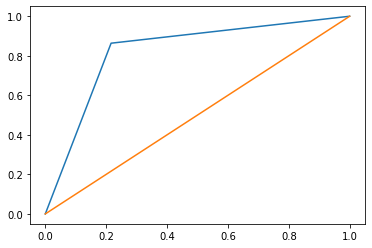

In [64]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpt,trp,threshold = roc_curve(y_test,y_pred)
plt.plot(fpt,trp)
plt.plot([0,1],[0,1])

Random Forest Classifier
    - It gives accuracy of 83%
    - Precision in 0 class out of all instance 79% were correctly predicted, in 1 class out of all instance 86% were correctly predicted by model.
    - For class '0,' the recall is 0.78. This means that the model correctly identified 84% of all actual class '0' instances.
    - For class '1,' the recall is 0.86. This means that the model correctly identified 84% of all actual class '1' instances.
 

In [75]:
df

Age  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  Oldpeak  \
0     40        140          289          0     Normal    172      0.0   
1     49        160          180          0     Normal    156      1.0   
2     37        130          283          0         ST     98      0.0   
3     48        138          214          0     Normal    108      1.5   
4     54        150          195          0     Normal    122      0.0   
..   ...        ...          ...        ...        ...    ...      ...   
913   45        110          264          0     Normal    132      1.2   
914   68        144          193          1     Normal    141      3.4   
915   57        130          131          0     Normal    115      1.2   
916   57        130          236          0        LVH    174      0.0   
917   38        138          175          0     Normal    173      0.0   

    ST_Slope  HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  \
0         Up             0      0      1                  0   
1       Flat             1      1      0                  0   
2         Up             0      0      1                  0   
3       Flat             1      1      0                  1   
4         Up             0      0      1                  0   
..       ...           ...    ...    ...                ...   
913     Flat             1      0      1                  0   
914     Flat             1      0      1                  1   
915     Flat             1      0      1                  1   
916     Flat             1      1      0                  0   
917       Up             0      0      1                  0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  ExerciseAngina_N  \
0                    1                  0                 0                 1   
1                    0                  1                 0                 1   
2                    1                  0                 0                 1   
3                    0                  0                 0                 0   
4                    0                  1                 0                 1   
..                 ...                ...               ...               ...   
913                  0                  0                 1                 1   
914                  0                  0                 0                 1   
915                  0                  0                 0                 0   
916                  1                  0                 0                 1   
917                  0                  1                 0                 1   

     ExerciseAngina_Y  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  
..                ...  
913                 0  
914                 0  
915                 1  
916                 0  
917                 0  

[918 rows x 17 columns]